In [10]:
%run ml_model_init.ipynb

## Fine tuning the models


### XgBoost (Goalkeepers and Midfielders)


In [291]:

from sklearn.model_selection import GridSearchCV
import numpy as np

# =========================================================================
# XGBoost regression:
# Parameters:
# n_estimators  "Number of gradient boosted trees. Equivalent to number
#                of boosting rounds."
# learning_rate "Boosting learning rate (also known as “eta”)"
# max_depth     "Maximum depth of a tree. Increasing this value will make
#                the model more complex and more likely to overfit."
# =========================================================================
regressor = xgb(eval_metric='rmsle')

# =========================================================================
# exhaustively search for the optimal hyperparameters
# =========================================================================
# set up our search grid
param_grid = {"max_depth":    [4, 5, 6],
              "n_estimators": np.arange(100, 1000, 50),
              "learning_rate": np.arange(0.01, .2, 0.005)}


In [292]:
# try out every combination of the above values
goalkeepers_search = GridSearchCV(regressor, param_grid, cv=5).fit(
    gk_threshold_train, gk_splits['target_train'])

print("The best hyperparameters are ", goalkeepers_search.best_params_)

The best hyperparameters are  {'learning_rate': 0.06499999999999999, 'max_depth': 4, 'n_estimators': 100}


In [293]:
# Deine the model with cv=5 for a 5-fold cross validation
# GridSearchCV has the best_estimator_ parameter that returns the  estimator
# which gave highest score (or smallest loss if specified)

mid_grid_search = GridSearchCV(regressor, param_grid, cv=5).fit(mid_20_train, mid_splits['target_train'])


print("The best midfielder hyperparameters are ", mid_grid_search.best_params_)

KeyboardInterrupt: 

In [ ]:
model = RandomForestRegressor()

param_grid = {'n_estimators': [8, 10, 12, 14, 16, 18, 20]}

# Define the possible values of the hyperparameter
grid = {
    'n_estimators': [8, 10, 12, 14, 16, 18, 20, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'random_state': [18]
}

In [ ]:
def_grid_search = GridSearchCV(model, grid, cv=5,
                              scoring='neg_root_mean_squared_error')
def_grid_search.fit(def_threshold_train, def_splits['target_train'])

print("The best defender hyperparameters are ", def_grid_search.best_params_)

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

The best defender hyperparameters are  {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}


In [ ]:

forwards_search = GridSearchCV(model, grid, cv=5,
                              scoring='neg_root_mean_squared_error').fit(
    k_sel_X_train, for_splits['target_train'])


print("The best midfielder hyperparameters are ", forwards_search.best_params_)

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
550 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
550 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\ensemble\_forest.py", line 359, in fit
    raise ValueError(
ValueError: Some value(s) of y are negative which is not allowed for Poisson regression.

  warnings.warn(some_fits_failed_message, FitFailedWarning)
c:\Users\

The best midfielder hyperparameters are  {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}


## With the hyperparameters


### Features used


In [ ]:
gk_columns = gk_threshold_train.columns
gk_columns, len(gk_columns)

(Index(['team_h_difficulty', 'team_a_difficulty', 'ict_index', 'expected_goals',
        'expected_assists', 'expected_goal_involvements',
        'expected_goals_conceded', 'starts_3', 'minutes_3', 'assists_3',
        'clean_sheets_3', 'goals_conceded_3', 'own_goals_3',
        'penalties_saved_3', 'yellow_cards_3', 'saves_3', 'bonus_3', 'bps_3',
        'influence_3', 'creativity_3', 'threat_3'],
       dtype='object'),
 21)

In [ ]:
def_columns = def_threshold_train.columns
def_columns, len(def_columns)

(Index(['team_h_difficulty', 'team_a_difficulty', 'ict_index', 'expected_goals',
        'expected_assists', 'expected_goal_involvements',
        'expected_goals_conceded', 'starts_3', 'minutes_3', 'goals_scored_3',
        'assists_3', 'clean_sheets_3', 'goals_conceded_3', 'own_goals_3',
        'yellow_cards_3', 'red_cards_3', 'bonus_3', 'bps_3', 'influence_3',
        'creativity_3', 'threat_3'],
       dtype='object'),
 21)

In [ ]:
mid_columns = mid_20_train.columns
mid_columns, len(mid_columns)

(Index(['ict_index', 'expected_goals_conceded'], dtype='object'), 2)

In [ ]:
for_columns = k_sel_X_train.columns
for_columns, len(for_columns)

(Index(['ict_index', 'expected_goals_conceded'], dtype='object'), 2)

### Goalkeepers


In [ ]:
hyperparameters = {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100}
FT_gk_xgb_reg = XGBoostRegression(gk_threshold_train, gk_threshold_test, gk_splits['target_train'], gk_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
gk_evaluation_stats = gk_evaluation_stats.assign(FT_gk_xgb_reg = [FT_gk_xgb_reg['train_RMSE'], FT_gk_xgb_reg['test_RMSE'], FT_gk_xgb_reg['cv_rmse'], FT_gk_xgb_reg['R2_train'], FT_gk_xgb_reg['R2_test']])
gk_evaluation_stats

,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg,MI_def_xgb_reg,FT_def_rf_reg,FT_gk_xgb_reg
train_RMSE,1.529196,0.039808,1.141958,1.343996,1.529196,0.039808,1.141175,1.343996,1.551237,0.137350,1.207874,1.372936,1.561806,0.339136,1.274768,1.372936,1.120973,0.910307
test_RMSE,1.541682,2.089080,1.467879,1.443681,1.541682,2.115970,1.472670,1.443681,1.549296,1.922268,1.423796,1.447142,1.559555,2.008664,1.480649,1.447142,1.446891,1.085887
cv_rmse,1.536195,2.072005,1.537579,1.496858,1.536195,2.110657,1.537696,1.496858,1.548900,2.095616,1.523675,1.502654,1.556759,2.051155,1.524027,1.502654,1.512877,1.135611
R2_train,0.532247,0.999683,0.739151,0.638685,0.532247,0.999683,0.739508,0.638685,0.518666,0.996227,0.708168,0.622958,0.512085,0.976994,0.674948,0.622958,0.748649,0.769933
R2_test,0.493289,0.069577,0.540642,0.555662,0.493289,0.045470,0.537639,0.555662,0.488272,0.212232,0.567819,0.553530,0.481472,0.139829,0.532615,0.553530,0.553684,0.640142


### Defenders


In [ ]:
hyperparameters = {'criterion': 'squared_error', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}
FT_def_rf_reg = RandomForestRegression(def_threshold_train, def_threshold_test, def_splits['target_train'], def_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
def_evaluation_stats = def_evaluation_stats.assign(FT_def_rf_reg = [FT_def_rf_reg['train_RMSE'], FT_def_rf_reg['test_RMSE'], FT_def_rf_reg['cv_rmse'], FT_def_rf_reg['R2_train'], FT_def_rf_reg['R2_test']])
def_evaluation_stats

count    10.000000
mean      1.512877
std       0.150032
min       1.299504
25%       1.383093
50%       1.515509
75%       1.656350
max       1.689785
dtype: float64


,base_def_lin_reg,base_def_dt_reg,base_def_rf_reg,base_def_xgb_reg,VarT_def_lin_reg,VarT_def_dt_reg,VarT_def_rf_reg,VarT_def_xgb_reg,KBest_def_lin_reg,KBest_def_dt_reg,KBest_def_rf_reg,KBest_def_xgb_reg,MI_def_lin_reg,MI_def_dt_reg,MI_def_rf_reg,MI_def_xgb_reg,FT_def_rf_reg
train_RMSE,1.529196,0.039808,1.141958,1.343996,1.529196,0.039808,1.141175,1.343996,1.551237,0.137350,1.207874,1.372936,1.561806,0.339136,1.274768,1.372936,1.120973
test_RMSE,1.541682,2.089080,1.467879,1.443681,1.541682,2.115970,1.472670,1.443681,1.549296,1.922268,1.423796,1.447142,1.559555,2.008664,1.480649,1.447142,1.446891
cv_rmse,1.536195,2.072005,1.537579,1.496858,1.536195,2.110657,1.537696,1.496858,1.548900,2.095616,1.523675,1.502654,1.556759,2.051155,1.524027,1.502654,1.512877
R2_train,0.532247,0.999683,0.739151,0.638685,0.532247,0.999683,0.739508,0.638685,0.518666,0.996227,0.708168,0.622958,0.512085,0.976994,0.674948,0.622958,0.748649
R2_test,0.493289,0.069577,0.540642,0.555662,0.493289,0.045470,0.537639,0.555662,0.488272,0.212232,0.567819,0.553530,0.481472,0.139829,0.532615,0.553530,0.553684


### Midfielders


In [ ]:
hyperparameters = {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 350}
FT_mid_xgb_reg = XGBoostRegression(mid_20_train, mid_20_test, mid_splits['target_train'], mid_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
mid_evaluation_stats = mid_evaluation_stats.assign(FT_mid_xgb_reg = [FT_mid_xgb_reg['train_RMSE'], FT_mid_xgb_reg['test_RMSE'], FT_mid_xgb_reg['cv_rmse'], FT_mid_xgb_reg['R2_train'], FT_mid_xgb_reg['R2_test']])
mid_evaluation_stats

,base_mid_lin_reg,base_mid_dt_reg,base_mid_rf_reg,base_mid_xgb_reg,VarT_mid_lin_reg,VarT_mid_dt_reg,VarT_mid_rf_reg,VarT_mid_xgb_reg,KBest_mid_lin_reg,KBest_mid_dt_reg,KBest_mid_rf_reg,KBest_mid_xgb_reg,MI_mid_lin_reg,MI_mid_dt_reg,MI_mid_rf_reg,MI_mid_xgb_reg,FT_mid_xgb_reg
train_RMSE,1.195768,0.044747,0.835339,1.018592,1.195768,0.044747,0.835838,1.018592,1.201743,0.090399,0.873006,1.045517,1.234406,0.255222,1.001407,1.045517,0.996938
test_RMSE,1.257223,1.723903,1.203523,1.212620,1.257223,1.689021,1.207576,1.212620,1.265553,1.709863,1.214114,1.213248,1.306726,1.743617,1.323912,1.213248,1.210024
cv_rmse,1.201918,1.581176,1.148612,1.147339,1.201918,1.587469,1.149261,1.147339,1.201814,1.632142,1.159815,1.139067,1.232410,1.625381,1.213803,1.139067,1.142954
R2_train,0.748295,0.999648,0.877164,0.817359,0.748295,0.999648,0.877018,0.817359,0.745773,0.998561,0.865837,0.807575,0.731766,0.988533,0.823470,0.807575,0.825042
R2_test,0.746011,0.522454,0.767245,0.763713,0.746011,0.541584,0.765675,0.763713,0.742634,0.530201,0.763131,0.763469,0.725616,0.511469,0.718351,0.763469,0.764724


### Forwards


In [ ]:
hyperparameters = {'criterion': 'friedman_mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 300, 'random_state': 18}
FT_for_rf_reg = RandomForestRegression(k_sel_X_train, k_sel_X_test, for_splits['target_train'], for_splits['target_test'], hyperparameters)

# Store the model evaluation details in a DataFrame
for_evaluation_stats = for_evaluation_stats.assign(FT_for_rf_reg = [FT_for_rf_reg['train_RMSE'], FT_for_rf_reg['test_RMSE'], FT_for_rf_reg['cv_rmse'], FT_for_rf_reg['R2_train'], FT_for_rf_reg['R2_test']])
for_evaluation_stats

count    10.000000
mean      1.157207
std       0.170589
min       0.920754
25%       1.020331
50%       1.130960
75%       1.267558
max       1.469881
dtype: float64


,base_for_lin_reg,base_for_dt_reg,base_for_rf_reg,base_for_xgb_reg,VarT_for_lin_reg,VarT_for_dt_reg,VarT_for_rf_reg,VarT_for_xgb_reg,KBest_for_lin_reg,KBest_for_dt_reg,KBest_for_rf_reg,KBest_for_xgb_reg,MI_for_lin_reg,MI_for_dt_reg,MI_for_rf_reg,MI_for_xgb_reg,FT_for_rf_reg
train_RMSE,1.121625,0.040603,0.652528,0.865933,1.121625,0.040603,0.654492,0.865933,1.148739,0.138301,0.775923,0.979669,1.148782,0.889425,0.951872,0.979669,0.840542
test_RMSE,1.207566,1.695151,1.220518,1.221652,1.207566,1.675957,1.213555,1.221652,1.210234,1.516598,1.262968,1.269802,1.210719,1.309705,1.222512,1.269802,1.216678
cv_rmse,1.147317,1.578892,1.113292,1.115114,1.147317,1.542577,1.111716,1.115114,1.147058,1.570754,1.187193,1.143553,1.145309,1.292484,1.190290,1.143553,1.157207
R2_train,0.810009,0.999751,0.935696,0.886758,0.810009,0.999751,0.935309,0.886758,0.800712,0.997111,0.909077,0.855057,0.800698,0.880531,0.863166,0.855057,0.893302
R2_test,0.780636,0.567725,0.775905,0.775488,0.780636,0.577459,0.778455,0.775488,0.779666,0.653993,0.760046,0.757442,0.779489,0.741958,0.775172,0.757442,0.777313


## Predictor Helper functions


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor as xgb
from sklearn.ensemble import RandomForestRegressor

def gk_predictor(prev_data, next_data):
    # Use the columns used in training and fine tuning
    columns = gk_columns
    prev_target = prev_data['total_points']
    prev_feats = prev_data.drop('total_points', axis='columns')
    prev_feats = prev_feats[columns]

    next_target = next_data['total_points']
    next_feats = next_data.drop('total_points', axis="columns")
    # next_feats = next_feats[columns.append('id')]

    regressor = xgb( n_estimators= 100, max_depth =4, learning_rate= 0.03,   eval_metric='rmsle')

    model = TransformedTargetRegressor(regressor, transformer=StandardScaler())

    model.fit(prev_feats.values, prev_target)

    predictions = []



    for i in range(0, len(next_feats)):
        # Get the player id

        gk_id = next_feats.iloc[i, :]['id']
        gk_features_next_ = next_feats.iloc[i, :].drop('id')
        gk_features_next_ = gk_features_next_[columns]
        pred = model.predict(gk_features_next_.values.reshape(1, -1))

        predictions.append(
            {'id': gk_id,  "position": 'gk', "total_points": next_target.iloc[i],  "predicted_points": pred[0]})

    print("Goalkeepers' prediction completed")
    return predictions


def def_predictor(prev_data, next_data):
    # Use the columns used in training and fine tuning
    columns = def_columns

    prev_target = prev_data['total_points']
    prev_feats = prev_data.drop('total_points', axis='columns')
    prev_feats = prev_feats[columns]

    next_target = next_data['total_points']
    next_feats = next_data.drop('total_points', axis="columns")
    # next_feats = next_feats[columns]


    model = TransformedTargetRegressor(RandomForestRegressor(n_estimators= 300,  criterion= 'squared_error', max_depth= 8, max_features= 'sqrt', random_state= 18), transformer=StandardScaler())
    model.fit(prev_feats, prev_target)

    predictions = []

    for i in range(0, len(next_feats)):
        # Get the player id
        def_id = next_feats.iloc[i, :]['id']
        def_features_next = next_feats.iloc[i, :].drop('id')
        def_features_next = def_features_next[columns]

        pred = model.predict(def_features_next.values.reshape(1, -1))

        predictions.append(
            {'id': def_id, "position": 'def', "total_points": next_target.iloc[i],  "predicted_points": pred[0]})

    print("Defenders' prediction completed")
    return predictions

def mid_predictor(prev_data, next_data):
    # Use the columns used in training and fine tuning
    columns = mid_columns
    prev_target = prev_data['total_points']
    prev_feats = prev_data.drop('total_points', axis='columns')
    prev_feats = prev_feats[columns]

    next_target = next_data['total_points']
    next_feats = next_data.drop('total_points', axis="columns")
    # next_feats = next_feats[columns.append('id')]

    regressor = xgb( learning_rate= 0.01, max_depth= 4, n_estimators= 350 ,  eval_metric='rmsle')

    model = TransformedTargetRegressor(regressor, transformer=StandardScaler())

    model.fit(prev_feats.values, prev_target)

    predictions = []


    for i in range(0, len(next_feats)):
        # Get the player id

        mid_id = next_feats.iloc[i, :]['id']
        mid_features_next_ = next_feats.iloc[i, :].drop('id')
        mid_features_next_ = mid_features_next_[columns]
        pred = model.predict(mid_features_next_.values.reshape(1, -1))

        predictions.append(
            {'id': mid_id,  "position": 'mid', "total_points": next_target.iloc[i],  "predicted_points": pred[0]})

    print("Midfielders' prediction completed")
    return predictions

def for_predictor(prev_data, next_data):
    # Use the columns used in training and fine tuning
    columns = for_columns

    prev_target = prev_data['total_points']
    prev_feats = prev_data.drop('total_points', axis='columns')
    prev_feats = prev_feats[columns]

    next_target = next_data['total_points']
    next_feats = next_data.drop('total_points', axis="columns")
    # next_feats = next_feats[columns]


    model = TransformedTargetRegressor(RandomForestRegressor(n_estimators= 300,  criterion= 'friedman_mse', max_depth= 8, max_features= 'sqrt', random_state= 18), transformer=StandardScaler())
    model.fit(prev_feats, prev_target)

    predictions = []

    for i in range(0, len(next_feats)):
        # Get the player id
        for_id = next_feats.iloc[i, :]['id']
        for_features_next = next_feats.iloc[i, :].drop('id')
        for_features_next = for_features_next[columns]

        pred = model.predict(for_features_next.values.reshape(1, -1))

        predictions.append(
            {'id': for_id, "position": 'for', "total_points": next_target.iloc[i],  "predicted_points": pred[0]})

    print("Forwards' prediction completed")
    return predictions

## General predictor


In [294]:
def prev_3(feats, data): # create a feature that data in last 3 gws

  data = data.copy()
  data = data.sort_values(by=['id', 'gw'])  # Sort by ID and gameweek
  # print(data)

  for feat in feats:
    data[feat+'_3'] = (
        data.groupby(['id'])[feat]
        .rolling(3, min_periods=1, closed='left').sum()).reset_index(level=0, drop=True).fillna(data[feat])
  return data

In [295]:
def clean(data):
    # Remove feature not to be used
    attributes = ['id','gw', 'team_h_difficulty', 'team_a_difficulty', 'position', 'minutes',  'goals_scored',
            'assists',  'clean_sheets',  'goals_conceded', 'own_goals', 'penalties_saved',
            'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
            'threat', 'ict_index', 'starts','expected_goals', 'expected_assists',
            'expected_goal_involvements', 'expected_goals_conceded', 'total_points']
    data = data[attributes]

    feats = ['starts','minutes',  'goals_scored',  'assists',  'clean_sheets',  'goals_conceded', 'own_goals', 'penalties_saved',
        'penalties_missed', 'yellow_cards', 'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity','threat']

    # For features  that are not available in a gw, get the cumulative values from previous 3 games
    y = prev_3(feats, data)

    player_data_3 = y.drop(feats, axis=1)

    return player_data_3

In [ ]:
def points_predictor(df, next_data_):
    prev_data = clean(df)
    # For prev data we can drop id since it is not used
    # prev_data = prev_data.drop('id', axis='columns')

    # For prev data we can drop gw since it is not used
    next_data = clean(next_data_)
    next_data = next_data.drop('gw', axis='columns')
    # Extract data by position in next_data
    goalkeepers_next = next_data.loc[next_data['position'] == 1].drop('position', axis='columns')
    defenders_next = next_data.loc[next_data['position'] == 2].drop('position', axis='columns')
    midfielders_next = next_data.loc[next_data['position'] == 3].drop('position', axis='columns')
    forwards_next = next_data.loc[next_data['position'] == 4].drop('position', axis='columns')

    # Extract data by position in prev_data
    goalkeepers_prev = prev_data.loc[prev_data['position'] == 1].drop('position', axis='columns')
    defenders_prev = prev_data.loc[prev_data['position'] == 2].drop('position', axis='columns')
    midfielders_prev = prev_data.loc[prev_data['position'] == 3].drop('position', axis='columns')
    forwards_prev = prev_data.loc[prev_data['position'] == 4].drop('position', axis='columns')


    # Predictions DataFrame
    predictions = pd.DataFrame()

    # Goalkeepers predictions
    # Call the predictor helper functions passing it the data that was used to train the model and the gw to be predicted
    gk_pred = gk_predictor(goalkeepers_prev, goalkeepers_next)

    # Append Gk predictions to predictions DataFrame
    predictions = predictions._append(pd.DataFrame(gk_pred), ignore_index=True)

    # Defenders predictions
    # Call the predictor helper functions
    def_pred = def_predictor(defenders_prev, defenders_next)

    # Append def predictions to predictions DataFrame
    predictions = predictions._append(
        pd.DataFrame(def_pred), ignore_index=True)

    # Midfielders predictions
    # Call the predictor helper functions
    mid_pred = mid_predictor(midfielders_prev, midfielders_next)

    # Append mid predictions to predictions DataFrame
    predictions = predictions._append(
        pd.DataFrame(mid_pred), ignore_index=True)

    # Forwards predictions
    # Call the predictor helper functions
    for_pred = for_predictor(forwards_prev, forwards_next)

    # Append mid predictions to predictions DataFrame
    predictions = predictions._append(
        pd.DataFrame(for_pred), ignore_index=True)

    return predictions.sort_values(by=['id'])


In [ ]:
predictions = points_predictor(df[df['gw']== 27], df[df['gw']== 28])
predictions

#### Plottings


##### Goalkeeprs


Goalkeepers' prediction completed


c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaco

Defenders' prediction completed
Midfielders' prediction completed


c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
c:\Users\Ilyas\anaco

Forwards' prediction completed


,id,position,total_points,predicted_points
729,1.0,for,0,0.026787
95,2.0,def,0,0.000460
366,3.0,mid,0,0.052628
367,4.0,mid,0,0.052628
96,5.0,def,1,1.868405
...,...,...,...,...
94,835.0,gk,0,0.038267
837,836.0,for,0,0.026787
364,837.0,def,0,0.000066
365,838.0,def,0,0.000066


In [ ]:
predictions[predictions['position']=='gk'].shape, predictions[predictions['position']=='def'].shape, predictions[predictions['position']=='mid'].shape, predictions[predictions['position']=='for'].shape

((95, 4), (271, 4), (363, 4), (109, 4))

c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ilyas\anaconda3\envs\FPL\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: xlabel='id', ylabel='predicted_points'>

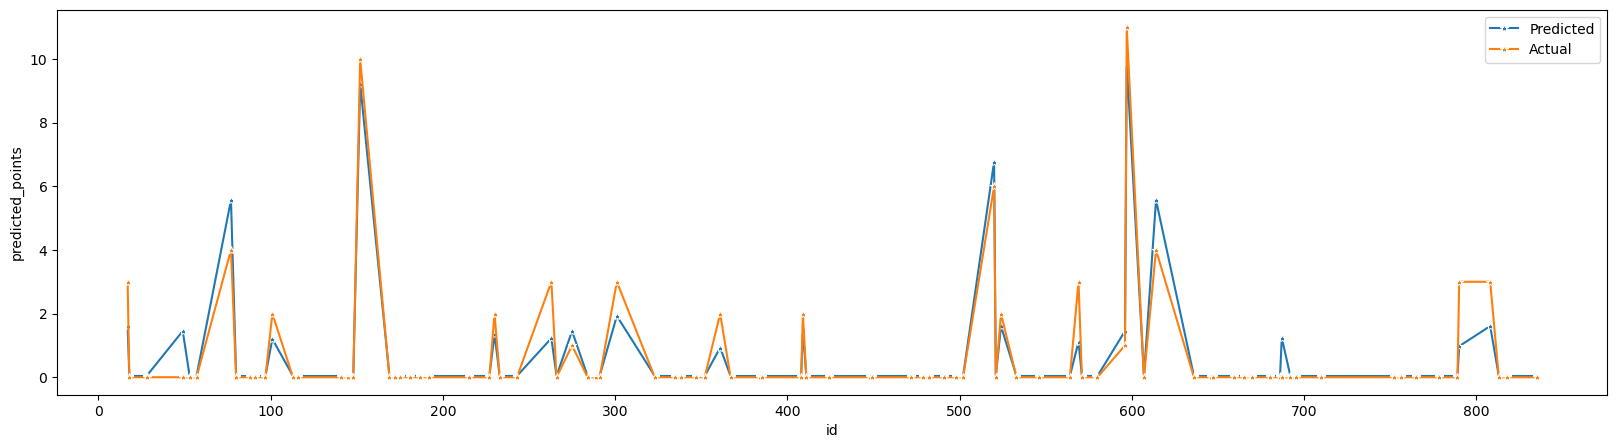

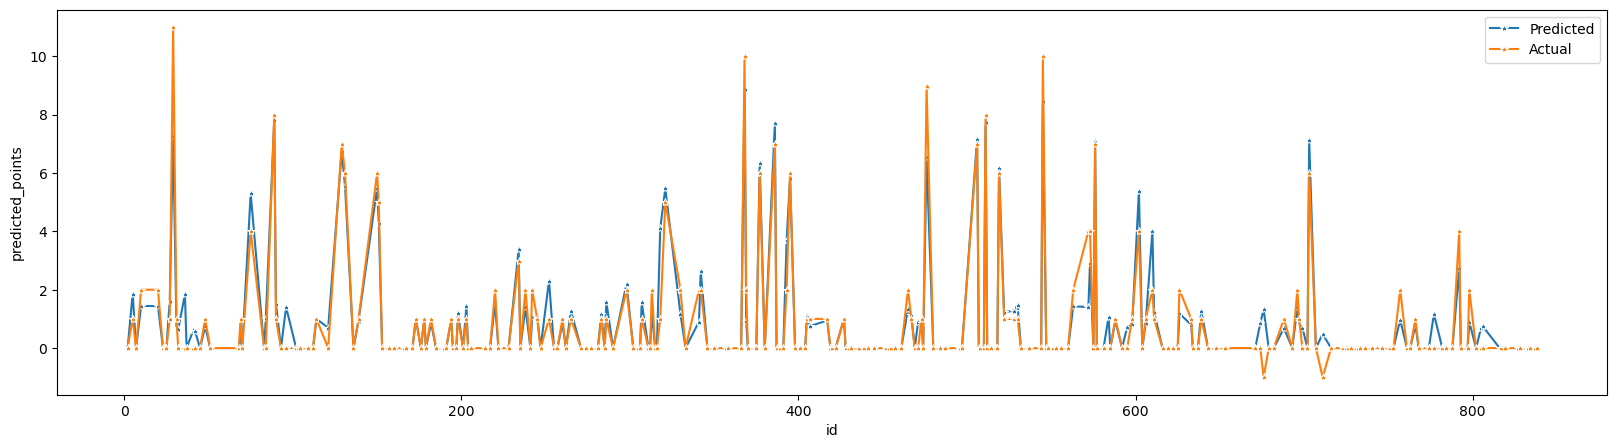

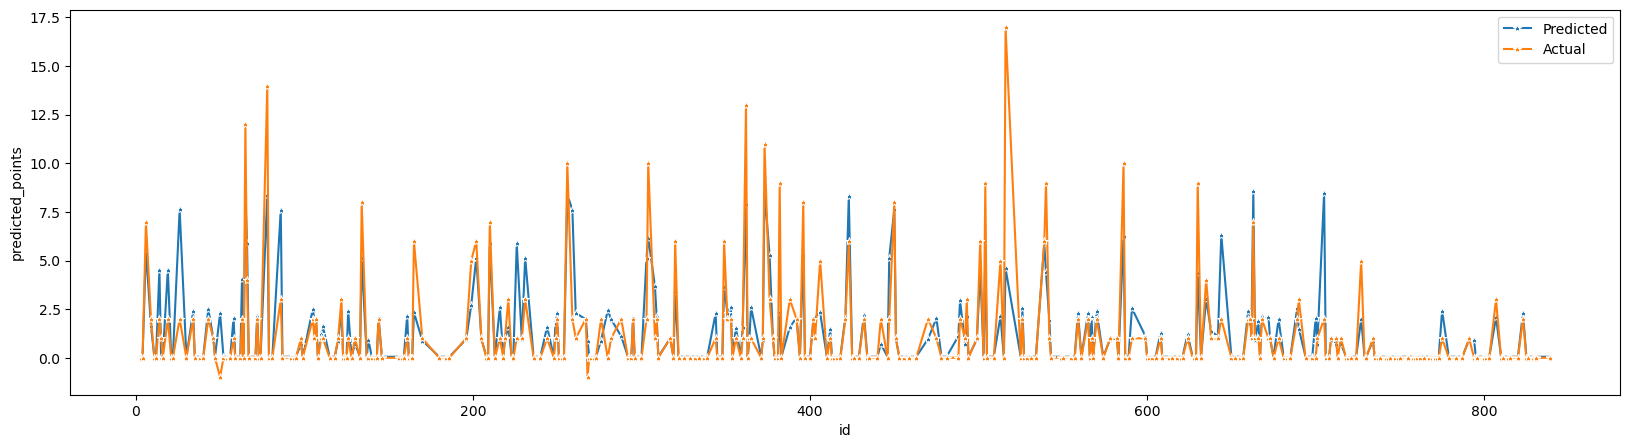

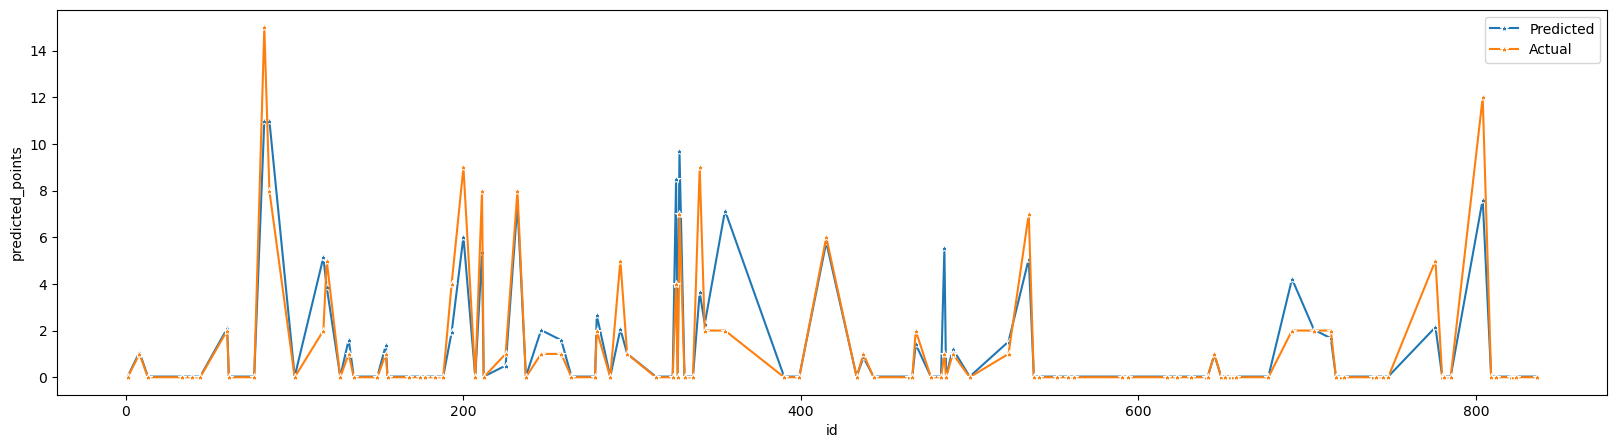

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

gk_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'gk'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'gk'],
             x="id", y='total_points', label="Actual", marker="*")

##### Defenders
def_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'def'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'def'],
             x="id", y='total_points', label="Actual", marker="*")

##### Midfielders
mid_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'mid'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'mid'],
             x="id", y='total_points', label="Actual", marker="*")

##### Forwards
for_fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=predictions[predictions['position'] == 'for'],
             x="id", y='predicted_points', label="Predicted", marker="*")
sns.lineplot(data=predictions[predictions['position'] == 'for'],
             x="id", y='total_points', label="Actual", marker="*")